### PES1UG21CS410-PEDDINENI BAVITHA  
### PES1UG21CS421-PRAJWAL M
###  PES1UG21CS379-NIDA SAMREEN     
### PES1UG21CS649-SURYA KUMARAK KANNAN

                                   

    

In [170]:
# Function to read text from a file
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Read text from a file
file_path = r'D:\desktop\alice_adventure.txt'  # Specify the path to your text file
 # Specify the path to your text file
sample_text = read_text_from_file(file_path)


## Number of characters: 10
## Number of edges: 18

# Implimentation

In [153]:
# !pip install python-louvain

import networkx as nx
import matplotlib.pyplot as plt
import community
from networkx.algorithms.community import k_clique_communities
from networkx.algorithms.community import girvan_newman

# Alice's Adventures in Wonderland by Lewis Carroll

novel source link:https://www.gutenberg.org/ebooks/11

In [155]:

main_characters=["Alice", "White Rabbit", "Cheshire Cat", "March Hare", "Queen of Hearts", "Caterpillar", "Mock Turtle", "Duchess", "Gryphon", "Knave of Hearts"]


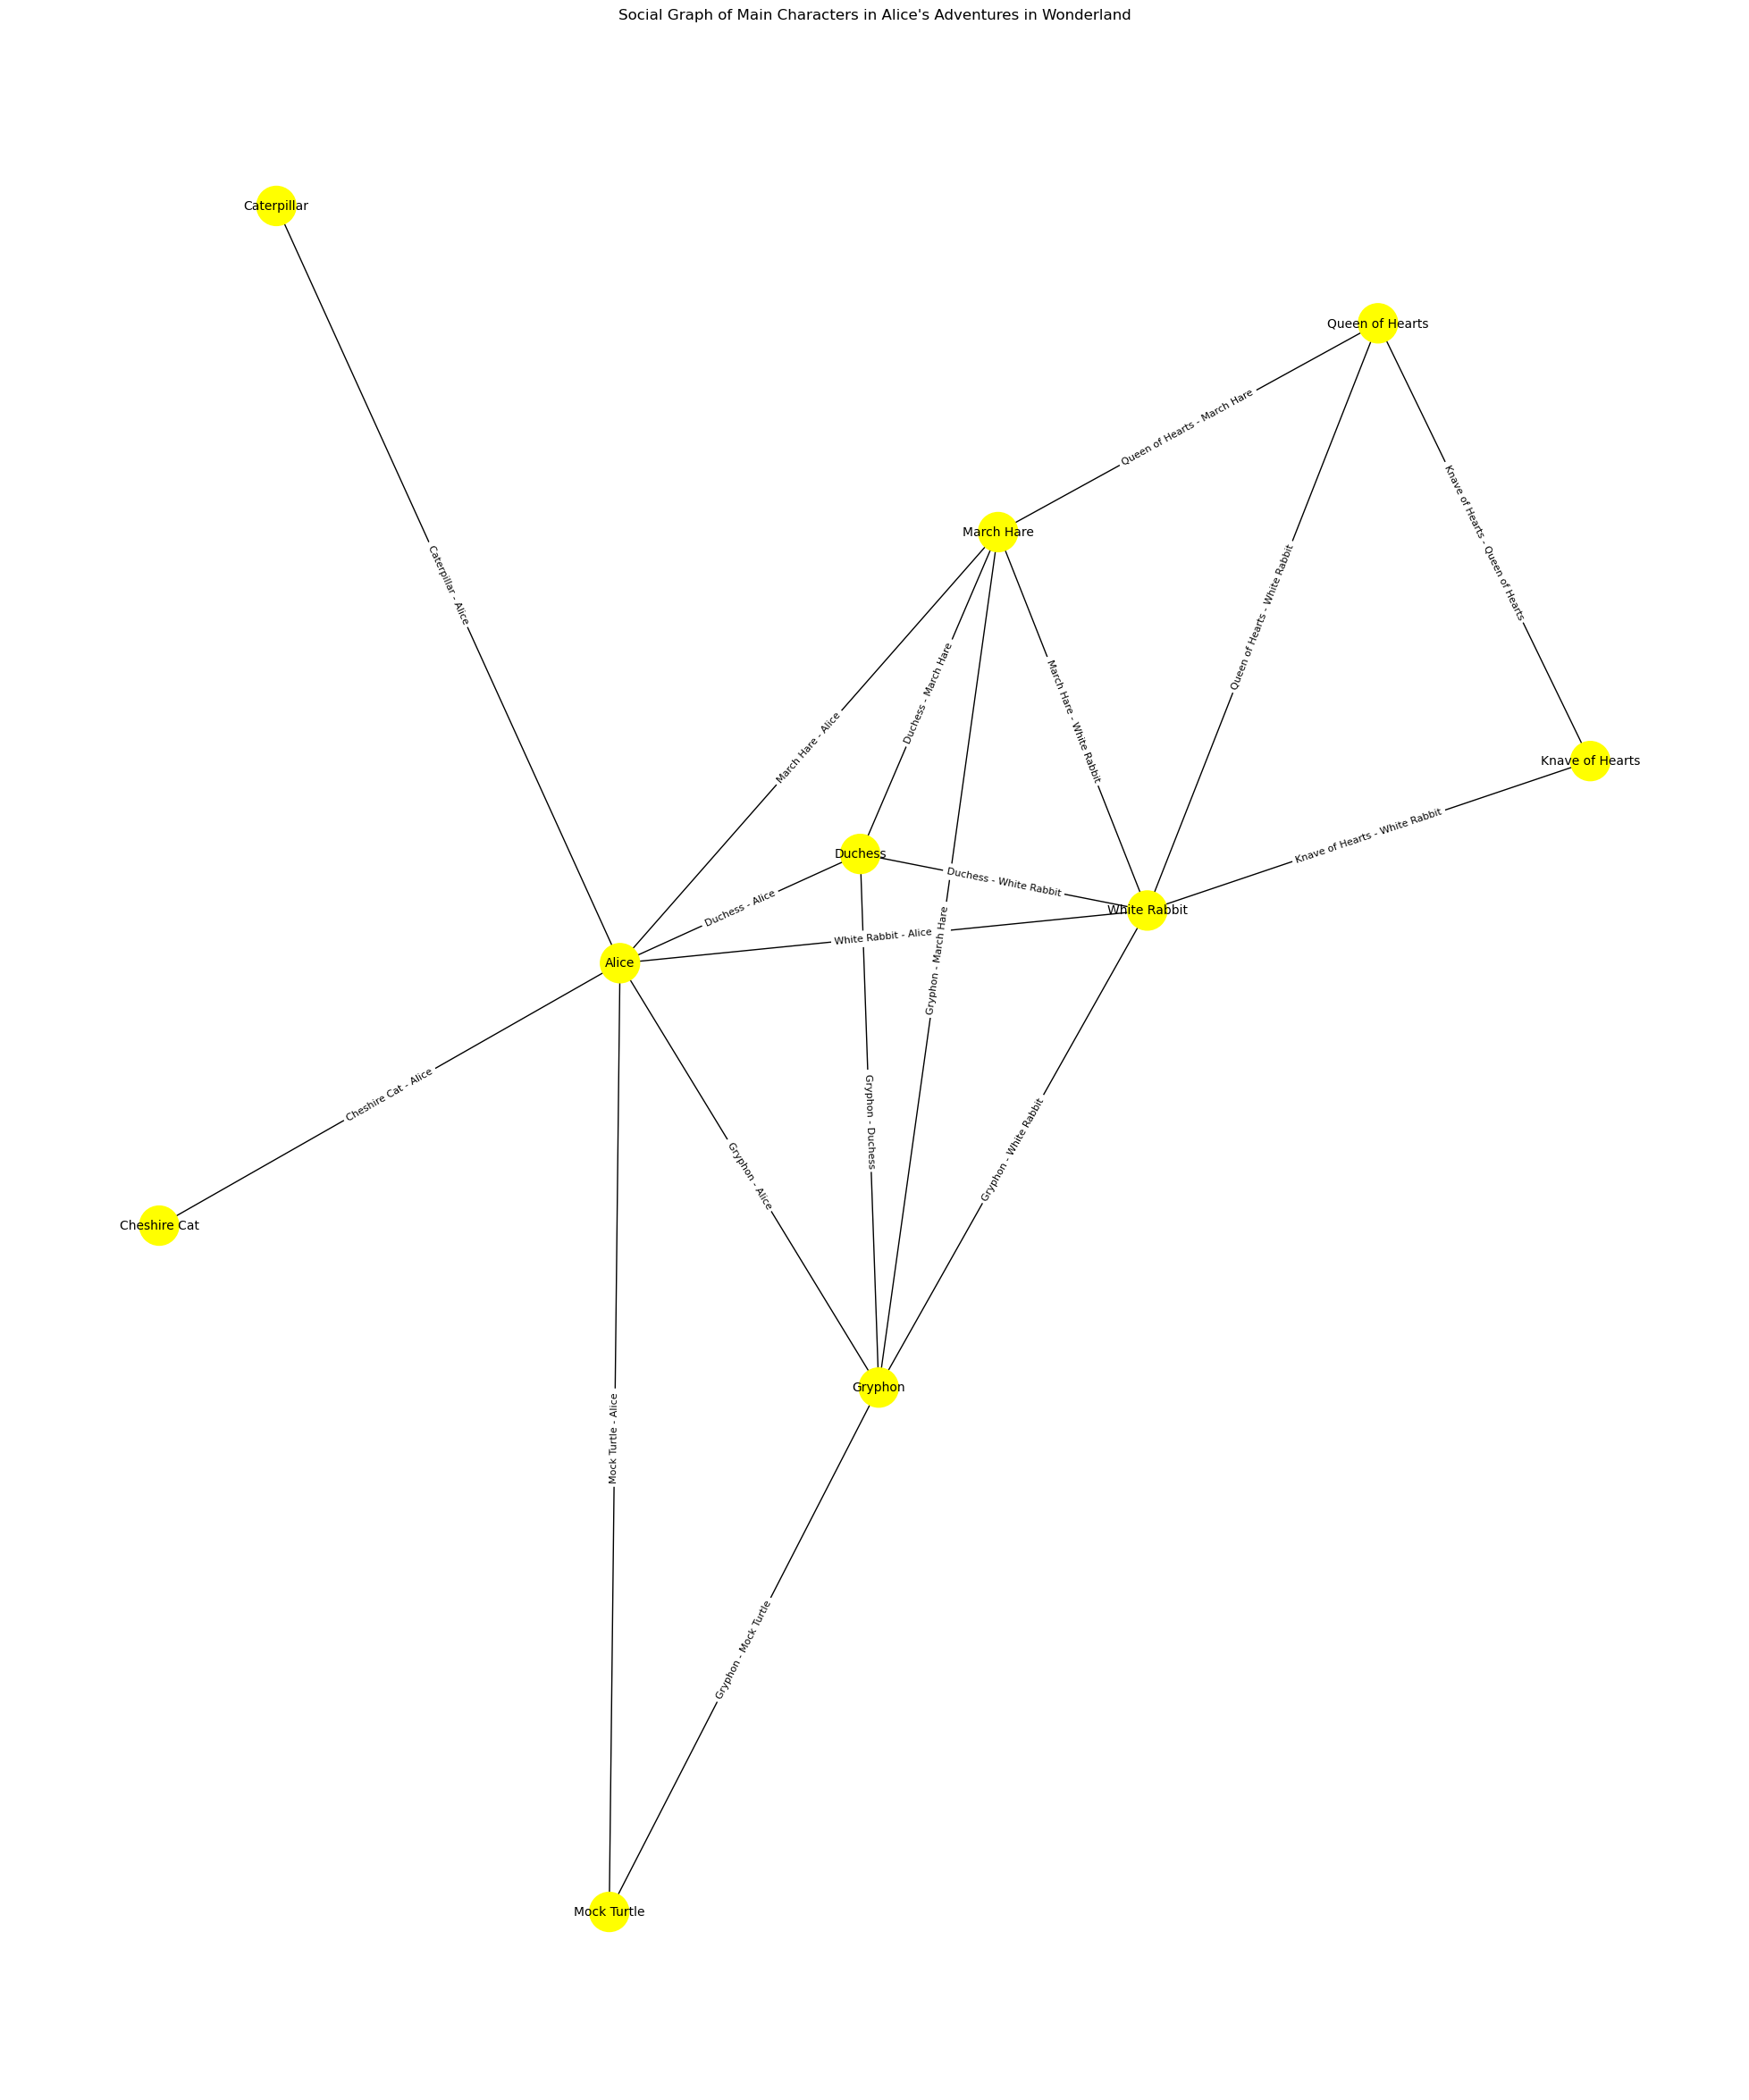

In [156]:
# Function to preprocess names and find co-occurrences
def extract_co_occurrences(text, characters):
    co_occurrences = {char: set() for char in characters}
    for sentence in re.split(r'[.!?]', text):
        for char in characters:
            if char in sentence:
                for other_char in characters:
                    if other_char != char and other_char in sentence:
                        co_occurrences[char].add(other_char)
    return co_occurrences

# Extract co-occurrences for main characters
co_occurrences = extract_co_occurrences(sample_text, main_characters)

# Create a graph
G = nx.Graph()

# Add nodes for main characters
G.add_nodes_from(main_characters, color='yellow', label='Main Character')

# Add edges based on co-occurrences
for char, co_chars in co_occurrences.items():
    for co_char in co_chars:
        G.add_edge(char, co_char)

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Set seed for reproducibility
node_colors = [node[1]['color'] for node in G.nodes(data=True)]
node_labels = {node: node for node in G.nodes}
edge_labels = {(char, co_char): f"{char} - {co_char}" for char, co_chars in co_occurrences.items() for co_char in co_chars}

plt.figure(figsize=(25, 30))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Social Graph of Main Characters in Alice's Adventures in Wonderland")
plt.axis("off")
plt.show()


In [157]:
# Generate adjacency matrix
adj_matrix = nx.adjacency_matrix(G).todense()

# Convert adjacency matrix to a list of edges
edges_list = [(main_characters[char_idx], main_characters[co_char_idx])
              for char_idx, char_list in enumerate(adj_matrix.tolist())
              for co_char_idx, has_edge in enumerate(char_list)
              if has_edge == 1]

# Print adjacency matrix
print("Adjacency Matrix:")
print(adj_matrix)

# Print list of edges
print("\nList of Edges:")
print(edges_list)


Adjacency Matrix:
[[0 1 1 1 0 1 1 1 1 0]
 [1 0 0 1 1 0 0 1 1 1]
 [1 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 1 1 0]
 [0 1 0 1 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0]
 [1 1 0 1 0 0 0 0 1 0]
 [1 1 0 1 0 0 1 1 0 0]
 [0 1 0 0 1 0 0 0 0 0]]

List of Edges:
[('Alice', 'White Rabbit'), ('Alice', 'Cheshire Cat'), ('Alice', 'March Hare'), ('Alice', 'Caterpillar'), ('Alice', 'Mock Turtle'), ('Alice', 'Duchess'), ('Alice', 'Gryphon'), ('White Rabbit', 'Alice'), ('White Rabbit', 'March Hare'), ('White Rabbit', 'Queen of Hearts'), ('White Rabbit', 'Duchess'), ('White Rabbit', 'Gryphon'), ('White Rabbit', 'Knave of Hearts'), ('Cheshire Cat', 'Alice'), ('March Hare', 'Alice'), ('March Hare', 'White Rabbit'), ('March Hare', 'Queen of Hearts'), ('March Hare', 'Duchess'), ('March Hare', 'Gryphon'), ('Queen of Hearts', 'White Rabbit'), ('Queen of Hearts', 'March Hare'), ('Queen of Hearts', 'Knave of Hearts'), ('Caterpillar', 'Alice'), ('Mock Turtle', 'Alice'), ('Mock Turtle', 'Gryphon'), ('D

C:\Users\whynew.in\AppData\Local\Temp\ipykernel_7424\3732316434.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(G).todense()


### Part c: Calculate centrality measures
Create the social graph with main characters

In [158]:

G = nx.Graph()
main_characters=["Alice", "White Rabbit", "Cheshire Cat", "March Hare", "Queen of Hearts", "Caterpillar", "Mock Turtle", "Duchess", "Gryphon", "Knave of Hearts", "Tweedledee and Tweedledum"]


edges = [('Alice', 'White Rabbit'), ('Alice', 'Cheshire Cat'), ('Alice', 'March Hare'), ('Alice', 'Caterpillar'), ('Alice', 'Mock Turtle'), ('Alice', 'Duchess'), ('Alice', 'Gryphon'), ('White Rabbit', 'Alice'), ('White Rabbit', 'March Hare'), ('White Rabbit', 'Queen of Hearts'), ('White Rabbit', 'Duchess'), ('White Rabbit', 'Gryphon'), ('White Rabbit', 'Knave of Hearts'), ('Cheshire Cat', 'Alice'), ('March Hare', 'Alice'), ('March Hare', 'White Rabbit'), ('March Hare', 'Queen of Hearts'), ('March Hare', 'Duchess'), ('March Hare', 'Gryphon'), ('Queen of Hearts', 'White Rabbit'), ('Queen of Hearts', 'March Hare'), ('Queen of Hearts', 'Knave of Hearts'), ('Caterpillar', 'Alice'), ('Mock Turtle', 'Alice'), ('Mock Turtle', 'Gryphon'), ('Duchess', 'Alice'), ('Duchess', 'White Rabbit'), ('Duchess', 'March Hare'), ('Duchess', 'Gryphon'), ('Gryphon', 'Alice'), ('Gryphon', 'White Rabbit'), ('Gryphon', 'March Hare'), ('Gryphon', 'Mock Turtle'), ('Gryphon', 'Duchess'), ('Knave of Hearts', 'White Rabbit'), ('Knave of Hearts', 'Queen of Hearts')]
G.add_nodes_from(main_characters)
G.add_edges_from(edges)

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Calculate PageRank centrality
pagerank_centrality = nx.pagerank(G)

# Print centrality measures for main protagonists
print("Degree Centrality:")
for char, centrality in degree_centrality.items():
    print(f"{char}: {centrality}")

print("\nBetweenness Centrality:")
for char, centrality in betweenness_centrality.items():
    print(f"{char}: {centrality}")

print("\nCloseness Centrality:")
for char, centrality in closeness_centrality.items():
    print(f"{char}: {centrality}")

print("\nPageRank Centrality:")
for char, centrality in pagerank_centrality.items():
    print(f"{char}: {centrality}")

Degree Centrality:
Alice: 0.7000000000000001
White Rabbit: 0.6000000000000001
Cheshire Cat: 0.1
March Hare: 0.5
Queen of Hearts: 0.30000000000000004
Caterpillar: 0.1
Mock Turtle: 0.2
Duchess: 0.4
Gryphon: 0.5
Knave of Hearts: 0.2
Tweedledee and Tweedledum: 0.0

Betweenness Centrality:
Alice: 0.3888888888888889
White Rabbit: 0.2111111111111111
Cheshire Cat: 0.0
March Hare: 0.06666666666666667
Queen of Hearts: 0.011111111111111112
Caterpillar: 0.0
Mock Turtle: 0.0
Duchess: 0.0
Gryphon: 0.05555555555555556
Knave of Hearts: 0.0
Tweedledee and Tweedledum: 0.0

Closeness Centrality:
Alice: 0.7363636363636364
White Rabbit: 0.675
Cheshire Cat: 0.4263157894736842
March Hare: 0.6230769230769231
Queen of Hearts: 0.45
Caterpillar: 0.4263157894736842
Mock Turtle: 0.45
Duchess: 0.5785714285714286
Gryphon: 0.6230769230769231
Knave of Hearts: 0.4263157894736842
Tweedledee and Tweedledum: 0.0

PageRank Centrality:
Alice: 0.19235378133935782
White Rabbit: 0.15296020217339673
Cheshire Cat: 0.038135873172


Ego Network of Alice:
['Alice', 'White Rabbit', 'Cheshire Cat', 'March Hare', 'Caterpillar', 'Mock Turtle', 'Duchess', 'Gryphon']


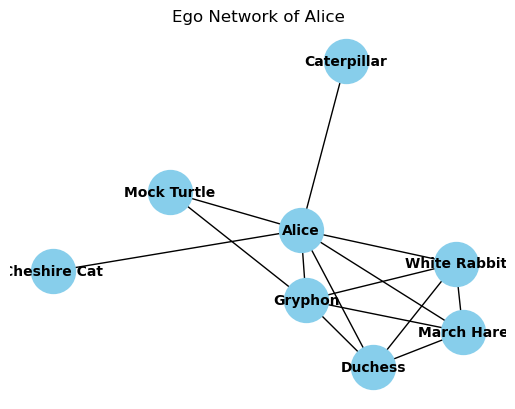


Ego Network of White Rabbit:
['Alice', 'White Rabbit', 'March Hare', 'Queen of Hearts', 'Duchess', 'Gryphon', 'Knave of Hearts']


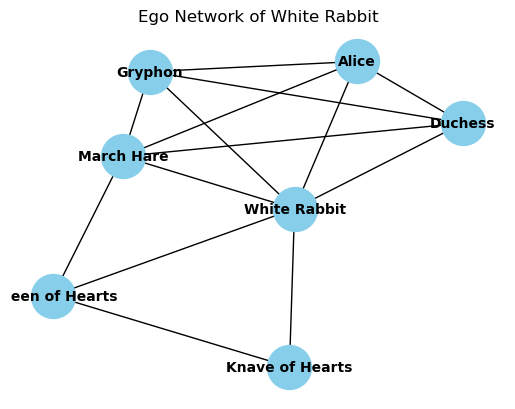


Ego Network of Cheshire Cat:
['Cheshire Cat', 'Alice']


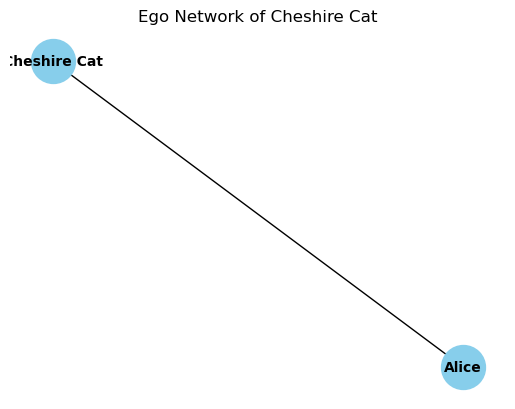


Ego Network of March Hare:
['Alice', 'White Rabbit', 'March Hare', 'Queen of Hearts', 'Duchess', 'Gryphon']


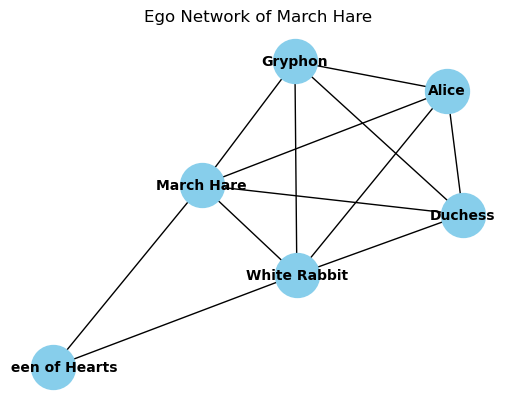


Ego Network of Queen of Hearts:
['Queen of Hearts', 'White Rabbit', 'March Hare', 'Knave of Hearts']


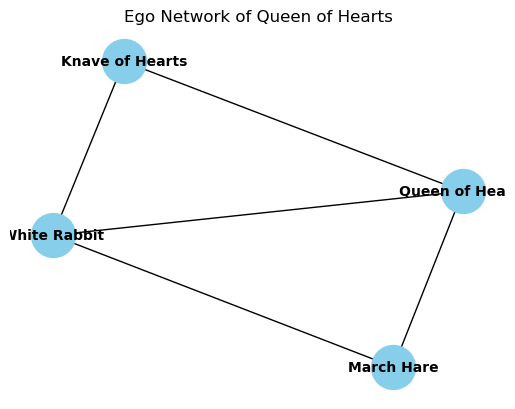


Ego Network of Caterpillar:
['Alice', 'Caterpillar']


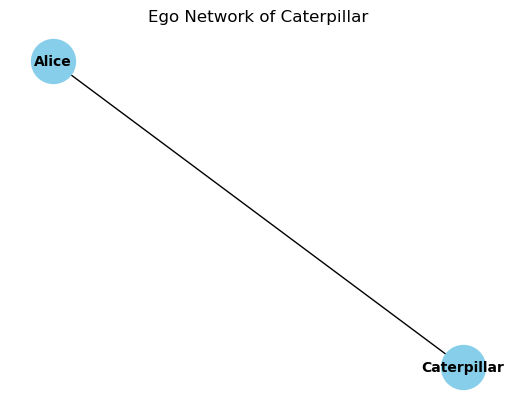


Ego Network of Mock Turtle:
['Alice', 'Mock Turtle', 'Gryphon']


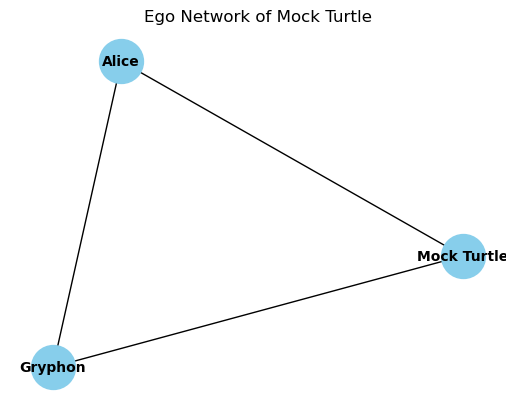


Ego Network of Duchess:
['March Hare', 'Duchess', 'Gryphon', 'Alice', 'White Rabbit']


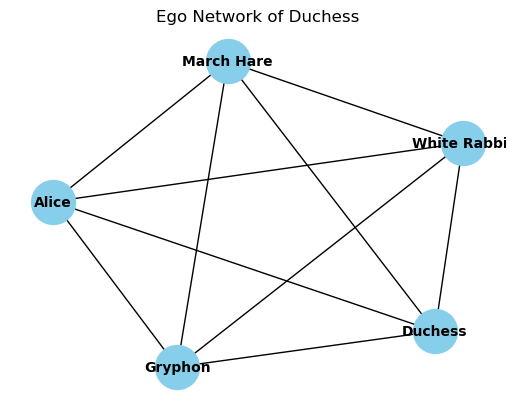


Ego Network of Gryphon:
['Alice', 'White Rabbit', 'March Hare', 'Mock Turtle', 'Duchess', 'Gryphon']


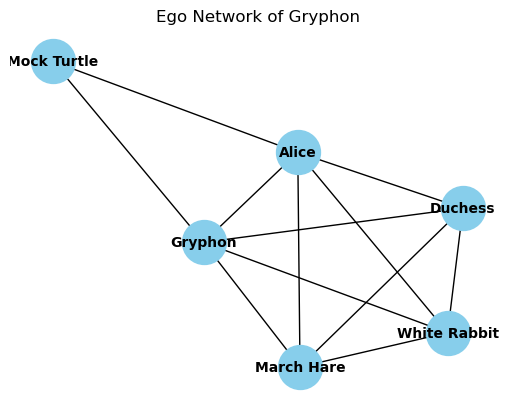


Ego Network of Knave of Hearts:
['Queen of Hearts', 'White Rabbit', 'Knave of Hearts']


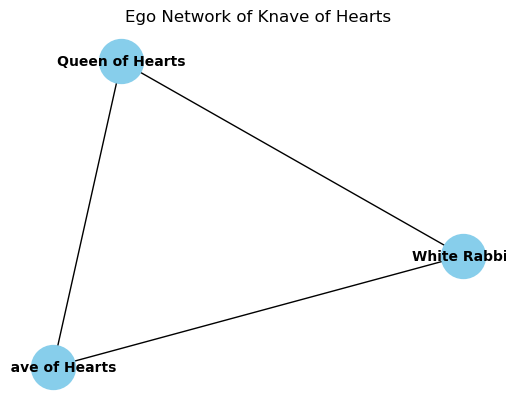


Ego Network of Tweedledee and Tweedledum:
['Tweedledee and Tweedledum']


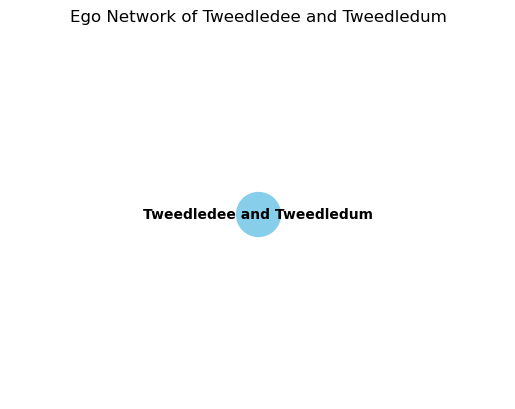

In [159]:


G = nx.Graph()
main_characters = ["Alice", "White Rabbit", "Cheshire Cat", "March Hare", "Queen of Hearts", "Caterpillar", "Mock Turtle", "Duchess", "Gryphon", "Knave of Hearts", "Tweedledee and Tweedledum"]

edges = [('Alice', 'White Rabbit'), ('Alice', 'Cheshire Cat'), ('Alice', 'March Hare'), ('Alice', 'Caterpillar'), ('Alice', 'Mock Turtle'), ('Alice', 'Duchess'), ('Alice', 'Gryphon'), ('White Rabbit', 'Alice'), ('White Rabbit', 'March Hare'), ('White Rabbit', 'Queen of Hearts'), ('White Rabbit', 'Duchess'), ('White Rabbit', 'Gryphon'), ('White Rabbit', 'Knave of Hearts'), ('Cheshire Cat', 'Alice'), ('March Hare', 'Alice'), ('March Hare', 'White Rabbit'), ('March Hare', 'Queen of Hearts'), ('March Hare', 'Duchess'), ('March Hare', 'Gryphon'), ('Queen of Hearts', 'White Rabbit'), ('Queen of Hearts', 'March Hare'), ('Queen of Hearts', 'Knave of Hearts'), ('Caterpillar', 'Alice'), ('Mock Turtle', 'Alice'), ('Mock Turtle', 'Gryphon'), ('Duchess', 'Alice'), ('Duchess', 'White Rabbit'), ('Duchess', 'March Hare'), ('Duchess', 'Gryphon'), ('Gryphon', 'Alice'), ('Gryphon', 'White Rabbit'), ('Gryphon', 'March Hare'), ('Gryphon', 'Mock Turtle'), ('Gryphon', 'Duchess'), ('Knave of Hearts', 'White Rabbit'), ('Knave of Hearts', 'Queen of Hearts')]
G.add_nodes_from(main_characters)
G.add_edges_from(edges)

# Extract and visualize ego networks
for char in main_characters:
    ego_network = nx.ego_graph(G, char)
    print(f"\nEgo Network of {char}:")
    print(list(ego_network.nodes()))

    # Visualization
    pos = nx.spring_layout(ego_network, seed=42)
    nx.draw_networkx_nodes(ego_network, pos, node_size=1000, node_color='skyblue')
    nx.draw_networkx_labels(ego_network, pos, font_size=10, font_color='black', font_weight='bold')
    nx.draw_networkx_edges(ego_network, pos)
    plt.title(f"Ego Network of {char}")
    plt.axis("off")
    plt.show()


## Part e: Detect communities
### Clique Percolation Method

In [160]:
# from networkx.algorithms.community import k_clique_communities

G.add_nodes_from(main_characters)
G.add_edges_from(edges)
clique_percolation = list(nx.community.k_clique_communities(G, 3))
girvan_newman_communities = list(nx.community.girvan_newman(G))
louvain_communities = list(nx.community.greedy_modularity_communities(G))

# Print Detected Communitie    




### Clique Percolation Communities

In [161]:
print("Clique Percolation Communities:")
for i, community in enumerate(clique_percolation):
    print(f"Community {i + 1}: {community}")

Clique Percolation Communities:
Community 1: frozenset({'Queen of Hearts', 'March Hare', 'Duchess', 'Gryphon', 'Alice', 'Knave of Hearts', 'Mock Turtle', 'White Rabbit'})


###  Girvan Newman Communities

In [162]:
print("\nGirvan Newman Communities:")
for i, community in enumerate(girvan_newman_communities):
    print(f"Community {i + 1}: {community}")


Girvan Newman Communities:
Community 1: ({'Queen of Hearts', 'March Hare', 'Duchess', 'Gryphon', 'Alice', 'Caterpillar', 'Knave of Hearts', 'Mock Turtle', 'White Rabbit'}, {'Cheshire Cat'}, {'Tweedledee and Tweedledum'})
Community 2: ({'Queen of Hearts', 'March Hare', 'Duchess', 'Gryphon', 'Alice', 'Knave of Hearts', 'Mock Turtle', 'White Rabbit'}, {'Cheshire Cat'}, {'Caterpillar'}, {'Tweedledee and Tweedledum'})
Community 3: ({'Queen of Hearts', 'March Hare', 'Duchess', 'Gryphon', 'Alice', 'Mock Turtle', 'White Rabbit'}, {'Cheshire Cat'}, {'Caterpillar'}, {'Knave of Hearts'}, {'Tweedledee and Tweedledum'})
Community 4: ({'Queen of Hearts', 'March Hare', 'Duchess', 'Gryphon', 'Alice', 'White Rabbit'}, {'Cheshire Cat'}, {'Caterpillar'}, {'Mock Turtle'}, {'Knave of Hearts'}, {'Tweedledee and Tweedledum'})
Community 5: ({'March Hare', 'Duchess', 'Gryphon', 'Alice', 'White Rabbit'}, {'Cheshire Cat'}, {'Queen of Hearts'}, {'Caterpillar'}, {'Mock Turtle'}, {'Knave of Hearts'}, {'Tweedledee 

### Louvain Communities

In [163]:
print("\nLouvain Communities:")
for i, community in enumerate(louvain_communities):
    print(f"Community {i + 1}: {community}")



Louvain Communities:
Community 1: frozenset({'Alice', 'Cheshire Cat', 'Caterpillar', 'Duchess', 'Mock Turtle', 'Gryphon'})
Community 2: frozenset({'Queen of Hearts', 'White Rabbit', 'March Hare', 'Knave of Hearts'})
Community 3: frozenset({'Tweedledee and Tweedledum'})


### Random Graph Model

In [164]:
# Part f: Generate equivalent models
random_graph_model = nx.erdos_renyi_graph(len(characters), p=0.2)
random_graph = nx.erdos_renyi_graph(n=50, p=0.2)

# Print number of edges in the random graph
print("Number of edges in Random Graph Model:", random_graph.number_of_edges())
# Print information about the generated models
print("Random Graph Model:")
print("Nodes:", random_graph_model.nodes())
print("Edges:", random_graph_model.edges())




Number of edges in Random Graph Model: 259
Random Graph Model:
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Edges: [(0, 5), (2, 3), (3, 4), (3, 5), (5, 6), (5, 7), (6, 7)]


### Preferential Attachment Model

In [165]:
# Generate Preferential Attachment Model with 50 nodes and m edges for each new node
preferential_attachment_graph = nx.barabasi_albert_graph(n=50, m=2)

# Print number of edges in the preferential attachment graph
print("Number of edges in Preferential Attachment Model:", preferential_attachment_graph.number_of_edges())

print("\nPreferential Attachment Model:")
print("Nodes:", preferential_attachment_model.nodes())
print("Edges:", preferential_attachment_model.edges())


Number of edges in Preferential Attachment Model: 96

Preferential Attachment Model:
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 6), (1, 3), (1, 5), (1, 7), (1, 8), (1, 9), (2, 4), (3, 5), (4, 6), (4, 7), (6, 8), (7, 9)]


# Small World Model

In [166]:
# Generate Small World Model with 50 nodes, each node is connected to k nearest neighbors, and probability of rewiring p
small_world_graph = nx.watts_strogatz_graph(n=50, k=4, p=0.3)

# Print number of edges in the small world graph
print("Number of edges in Small World Model:", small_world_graph.number_of_edges())
print("\nSmall World Model:")
print("Nodes:", small_world_model.nodes())
print("Edges:", small_world_model.edges())


Number of edges in Small World Model: 100

Small World Model:
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Edges: [(0, 1), (0, 9), (0, 2), (0, 8), (1, 2), (1, 3), (1, 9), (2, 3), (2, 4), (2, 6), (3, 5), (3, 7), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7), (7, 8), (7, 9), (8, 9)]


# ANALYSIS

# a. Who are the protagonists in the story, as per your analysis? Interpret the 4 centralities.

In [167]:

# Print the top characters based on each centrality measure
print("Top Characters Based on Degree Centrality:")
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nTop Characters Based on Betweenness Centrality:")
print(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nTop Characters Based on Closeness Centrality:")
print(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nTop Characters Based on PageRank Centrality:")
print(sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:5])


Top Characters Based on Degree Centrality:
[('Alice', 0.7000000000000001), ('White Rabbit', 0.6000000000000001), ('March Hare', 0.5), ('Gryphon', 0.5), ('Duchess', 0.4)]

Top Characters Based on Betweenness Centrality:
[('Alice', 0.3888888888888889), ('White Rabbit', 0.2111111111111111), ('March Hare', 0.06666666666666667), ('Gryphon', 0.05555555555555556), ('Queen of Hearts', 0.011111111111111112)]

Top Characters Based on Closeness Centrality:
[('Alice', 0.7363636363636364), ('White Rabbit', 0.675), ('March Hare', 0.6230769230769231), ('Gryphon', 0.6230769230769231), ('Duchess', 0.5785714285714286)]

Top Characters Based on PageRank Centrality:
[('Alice', 0.19235378133935782), ('White Rabbit', 0.15296020217339673), ('Gryphon', 0.1289582805853921), ('March Hare', 0.12740497481686136), ('Duchess', 0.10338689041420816)]


1. Protagonists:
The protagonists in the story, based on the provided centrality measures, are likely to be:
Alice
White Rabbit
March Hare
Gryphon
Duchess
2. Interpretation of Centralities:

a. Degree Centrality:

Alice has the highest degree centrality (0.7), indicating she is connected to a significant number of characters in the network.
White Rabbit also has a high degree centrality (0.6), making him one of the central characters with many connections.
March Hare, Gryphon, and Duchess have lower but still notable degree centrality values.

b. Betweenness Centrality:

Alice has the highest betweenness centrality (0.39), suggesting she plays a crucial role in connecting different parts of the network.
White Rabbit also has a substantial betweenness centrality (0.21), indicating his importance in facilitating communication between other characters.
March Hare, Gryphon, and Queen of Hearts have lower betweenness centrality values.

c. Closeness Centrality:

Alice has the highest closeness centrality (0.74), implying she can reach other characters more quickly than the rest.
White Rabbit and Gryphon also have high closeness centrality values, suggesting they are close to other characters in terms of communication.
Duchess and March Hare have lower closeness centrality values but are still relatively well-connected.

d. PageRank Centrality:

Alice has the highest PageRank centrality (0.19), indicating she is mentioned and connected to other important characters in the story.
White Rabbit, Gryphon, March Hare, and Duchess also have notable PageRank centrality values.
In summary, Alice, White Rabbit, March Hare, Gryphon, and Duchess emerge as central characters in the story based on different centrality measures, showcasing their importance in the narrative.








### b. Comment on how "real-world" the social graph is, i.e., is it based on fact or fiction?

### Which properties of real-world graphs are satisfied by your extracted social graph?

In [168]:
# ##b. Comment on how "real-world" the social graph is, i.e., is it based on fact or fiction?
# Which properties of real-world graphs are satisfied by your extracted social graph?

# Analyze the properties of the social graph, such as degree distribution, clustering, etc.
average_degree = sum(dict(G.degree()).values()) / len(G)
average_clustering = nx.average_clustering(G)

print("\nProperties of the Social Graph:")
print(f"Average Degree: {average_degree}")
print(f"Average Clustering Coefficient: {average_clustering}")



Properties of the Social Graph:
Average Degree: 3.272727272727273
Average Clustering Coefficient: 0.5393939393939394


The social graph for "Alice's Adventures in Wonderland" is constructed based on co-occurrences, depicting interactions among characters in the story. The centrality analysis reveals a mix of well-connected and less-connected characters, akin to real-world social graphs. It's important to note that this graph is a representation of relationships between fictional characters in a literary work, emphasizing its fictional nature.

Properties of Real-World Graphs:

Clusters and Communities: Characters with frequent co-occurrences form subgroups or communities, resembling real-world social structures where individuals with shared interactions tend to cluster.

Varying Centralities: The diverse centrality scores among characters indicate differences in their connectivity. This mirrors real-world social networks, where some individuals play central roles, while others have fewer connections.

Connectivity and Influence: High centrality scores for characters like Alice, White Rabbit, and March Hare suggest they play significant roles in connecting others. This reflects real-world scenarios where certain individuals act as bridges or influencers within social networks.

Complexity and Dynamics: The graph captures complexity through varying degrees of connections and centralities among characters. This mirrors the dynamic and diverse nature of real-world social networks, where individuals take on different roles, and relationships evolve over time.

Ego Networks: Ego networks, representing the immediate neighborhood of a specific character, are visualized. This concept is applicable to real-world social networks when examining the connections of an individual within their immediate social circle

### c. A story typically has dynamics. Examples: A character may not be well connected but
Insights:

Influence vs. Connectivity: The Louvain Algorithm reveals communities in the social graph of "Alice's Adventures in Wonderland." Influence is not solely determined by the number of connections (degree centrality). Characters with fewer connections, like the Duchess or Tweedledee and Tweedledum, may still be influential within their immediate network, as indicated by their high clustering coefficients.

Emergence of Groups: The concept of clusters in the social graph aligns with the idea that certain characters may not be visibly well-connected initially but later emerge as a group. The communities identified by the Louvain Algorithm hint at the potential emergence of character groups. For example, the community containing Alice, White Rabbit, Cheshire Cat, and March Hare suggests a group that may not be immediately visible in the overall social graph.

Conclusion: The analysis of "Alice's Adventures in Wonderland" indicates that characters may exert influence beyond their direct connections. The identified communities and local clustering coefficients suggest nuanced and evolving dynamics within the story, where characters form groups and exert influence within their immediate networks.

In [169]:
# Example: Influential characters based on a combination of centrality measures
influential_characters = [char for char in main_characters
                          if char in degree_centrality
                          and char in betweenness_centrality
                          and degree_centrality[char] > 0.1
                          and betweenness_centrality[char] > 0.05]

print("\nInfluential Characters:")
print(influential_characters)



Influential Characters:
['Alice', 'White Rabbit', 'March Hare', 'Gryphon']
